In [1]:
from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.labelling import DataLabellingSimple
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))


In [2]:
import fileutils as fileutils
listDataPath =os.listdir(fileutils.data_path)
symbols_listDataPath =[s for s in listDataPath if s.endswith('.L') or s.endswith('.I')]
fileutils.data_path


'/media/ak/DataOnly/FinDataReal/'

In [3]:
def get_files_for_ticker(ticker):
    """
    :return: Return all file names available for ticker, sort by name which is date
    """
    fin_data_dir = os.path.join("/media/ak/DataOnly",'Data') 
    total_path = os.path.join(fin_data_dir, ticker)
    # os.path.join(total_path, f)
    files_for_ticker = [f.split('.')[0] for f in os.listdir(total_path)
                        if (os.path.isfile(os.path.join(total_path, f)) and '.csv' in f and 'lock' not in f)]

    files_for_ticker.sort()
    return files_for_ticker

In [4]:
listofLabelsSymbols = os.listdir(fileutils.labels_path)
print("A bunch of symbols from the listdir above:",listofLabelsSymbols) 
LabelsPathsNames = ['Labels','LabelsAlternateOne','LabelsAlternateTwo','LabelsAlternateThree']

A bunch of symbols from the listdir above: ['EGS.L', 'SMIN.L', 'CRH.I', 'BLT.L', 'CNA.L', 'PRU.L', 'SHP.L', 'RTO.L', 'BATS.L', 'ULVR.L', 'RR.L', 'CPI.L', 'IEER.L', 'UU.L', 'RDSa.L', 'RSA.L', 'SPT.L', 'CEY.L', 'RB.L', 'TSCO.L', 'PSON.L', 'SDR.L', 'APF.L', 'STAN.L', 'REL.L', 'GKN.L', 'DMGOa.L', 'AZN.L', 'ECM.L', 'CCL.L', 'SGE.L', 'HSBA.L', 'RDSb.L', 'DGE.L', 'CPG.L', 'BARC.L', 'AV.L', 'AAL.L', 'VOD.L', 'RBS.L']


In [5]:
symbolsFirstLabels = os.listdir(fileutils.labels_path)
# for idx, symbol in enumerate(symbolsFirstLabels):
#     print(symbol)


In [6]:

index =10
nonDirectional = os.path.join(fileutils.labels_path, symbolsFirstLabels[index],'NON_DIRECTIONAL')

listofDates = os.listdir(nonDirectional)
sd = listofDates[0].split('.')[0]
ed = listofDates[-1].split('.')[0]

# fileIDX = 1
# pd.read_csv(os.path.join(nonDirectional,os.listdir(nonDirectional)[1]))
print(sd, ed, symbolsFirstLabels[index])

20180314 20180315 RR.L


In [7]:
# for ticker in symbolsFirstLabels:
#     symboldateslist=get_files_for_ticker(str(ticker))
#     sd = symboldateslist[0]
#     ed = symboldateslist[-1]
#     print(sd,ed)

In [8]:
cleanRawList =os.listdir(fileutils.clean_raw_data_path)
symbols_rawList =[s for s in cleanRawList if s.endswith('.L') or s.endswith('.I')]
# crh_folder = os.path.join(fileutils.clean_raw_data_path, 'CRH.I')
# pd.read_csv(os.path.join(crh_folder, os.listdir(crh_folder)[1]))

In [9]:

#os.listdir(os.path.join("/media/ak/DataOnly",'Data') )

In [10]:
symboldateslist=get_files_for_ticker('BARC.L')
#file= pd.read_csv(os.path.join(fileutils.clean_raw_data_path,'AV.L',symboldateslist[0]+'.csv'  ))

In [11]:
#os.listdir('/media/ak/DataOnly/Data/')

In [12]:
ticker = 'BARC.L'

sd = symboldateslist[0]
ed = symboldateslist[-1]

trading_hours_filter = TradingHours.only_mkt_hours

data_loader = DataLoader(trading_hours_filter)

data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
print(data.keys())


dict_keys(['20170116', '20170117', '20170118', '20170119', '20170120', '20170123', '20170124', '20170125', '20170126', '20170127', '20170130', '20170131', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929'])


In [80]:
trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter, ccy_bar=1000)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)


labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window': 10,
#     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window': 5,
#     'updown_thrshd_vol_pct': 10.,
#     'trading_hours_filter': trading_hours_filter,
# },
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 10,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.01,
#     'threshold_method': ThresholdMethod.arbitrary},
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 20,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.01,
#     'threshold_method': ThresholdMethod.arbitrary},
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 20,
#     # Uncomment below if you want to check a price move only above a certain level
#     'updown_threshold': 0.05,
#     'threshold_method': ThresholdMethod.arbitrary},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 2,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0001,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 5,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0005,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 2,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.005,
    'threshold_method': ThresholdMethod.arbitrary,}
    ,
{
    'labelling_method': LabellingChoice.ep_in_window,
    'rolling_window': 9,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0008,
    'threshold_method': ThresholdMethod.arbitrary,}
# },
# {
#     'labelling_method': LabellingChoice.price_move_in_window,
#     'rolling_window': 2,
#     # Uncomment below if you want to check a price move only above a certain level
#     # 'updown_threshold': 0.1
#     # 'threshold_method': ThresholdMethod.arbitrary,
]



In [81]:
# labeller = DataLabellingSimple(
#                     # Style of labelling method - Here we compare rolling 
#                     # inervals end points in absolute terms 
#                     labelling_method=LabellingChoice.price_move_in_window, 
#                     # Window for labelling method= Number of look ahead trades that control up /down move
#                     rolling_window=5,
#                     # Calculate threshold by means of moving average historical vol
#                     thrshd_method=ThresholdMethod.historical_vol_ma,
#                     # Use the last 5 days for the above average. 
#                     thrshd_vol_window=5,
#                     # Pct of historical vol to use for threshold, i.e. 0.1 * historical vol
#                     updown_thrshd_vol_pct=10.)

In [82]:
# labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window_': np.int(100),
# #     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window_': 0.1,
#     'updown_thrshd_vol_pct_': 10.,
#     'trading_hours_filter_': trading_hours_filter,
# }]

In [83]:
DataLabellingSimple?

In [84]:
for label_init in labelling_method_params:
    labeller = DataLabellingSimple(label_init)
    the_label = labeller.get_label_name()
    labeller.label_training_data(data)

print ("ok")

ok


In [85]:
labelling_method_params

[{'labelling_method': 'MovAv',
  'rolling_window': 2,
  'updown_threshold': 0.0001,
  'threshold_method': 'arbitrary'},
 {'labelling_method': 'MovAv',
  'rolling_window': 5,
  'updown_threshold': 0.0005,
  'threshold_method': 'arbitrary'},
 {'labelling_method': 'PrMov',
  'rolling_window': 2,
  'updown_threshold': 0.005,
  'threshold_method': 'arbitrary'},
 {'labelling_method': 'EndPo',
  'rolling_window': 9,
  'updown_threshold': 0.0008,
  'threshold_method': 'arbitrary'}]

In [88]:
df = data[list(data.keys())[3]]
differentLabelTypes=df.filter(like='label', axis=1).columns.values
differentLabelTypes

array(['label_PrMov__window_10__thres_arbitrary__0.5',
       'label_PrMov__window_15__thres_arbitrary__0.5',
       'label_PrMov__window_2__thres_arbitrary__0.5',
       'label_PrMov__window_7__thres_arbitrary__0.8',
       'label_EndPo__window_7__thres_arbitrary__0.8',
       'label_MovAv__window_10__thres_arbitrary__0.5',
       'label_MovAv__window_5__thres_arbitrary__0.1',
       'label_MovAv__window_2__thres_arbitrary__0.0',
       'label_EndPo__window_9__thres_arbitrary__0.1'], dtype=object)

In [89]:
for key in list(data.keys()):
    print(key)
    df = data[key]
    differentLabelTypes=df.filter(like='label', axis=1).columns.values
    print(str(differentLabelTypes[7]))
    print(df[differentLabelTypes[7]].value_counts())
    print('----------------------***-----------------')
    print(str(differentLabelTypes[6]))
    print(df[differentLabelTypes[6]].value_counts())    
    print('----------------------')

20170116
label_MovAv__window_2__thres_arbitrary__0.0
 0.0    2394
 1.0    1404
-1.0    1355
Name: label_MovAv__window_2__thres_arbitrary__0.0, dtype: int64
----------------------***-----------------
label_MovAv__window_5__thres_arbitrary__0.1
 0.0    4670
-1.0     271
 1.0     209
Name: label_MovAv__window_5__thres_arbitrary__0.1, dtype: int64
----------------------
20170117
label_MovAv__window_2__thres_arbitrary__0.0
 0.0    3944
-1.0    2230
 1.0    2207
Name: label_MovAv__window_2__thres_arbitrary__0.0, dtype: int64
----------------------***-----------------
label_MovAv__window_5__thres_arbitrary__0.1
 0.0    7693
 1.0     395
-1.0     290
Name: label_MovAv__window_5__thres_arbitrary__0.1, dtype: int64
----------------------
20170118
label_MovAv__window_2__thres_arbitrary__0.0
 0.0    4540
-1.0    1892
 1.0    1838
Name: label_MovAv__window_2__thres_arbitrary__0.0, dtype: int64
----------------------***-----------------
label_MovAv__window_5__thres_arbitrary__0.1
 0.0    7799
-1.0  

In [19]:
# for key_, _ in enumerate(keys_):
#     data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)

In [20]:
# for dataKey in list(data.keys()):
    

In [21]:
#df[differentLabelTypes[0]].value_counts()#[1]/df[differentLabelTypes[1]].value_counts()[0]

In [22]:
keys=list(data.keys())
from collections import defaultdict
labelsDict = defaultdict(dict)

for key in keys:
    df =pd.DataFrame(data[key])
    differentLabelTypes = df.filter(like='label', axis=1).columns.values
    print(differentLabelTypes)
    print(differentLabelTypes.shape[0])
    for i in range(differentLabelTypes.shape[0]):
        print(i)
        try:
            print(key)
            labelsDict[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[1]/df[differentLabelTypes[i]].value_counts()[0]
        except:
            print('continuing')
            continue
    


['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170116
1
20170116
2
20170116
3
20170116
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170117
1
20170117
2
20170117
3
20170117
continuing
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170118
1
20170118
2
20170118
3
20170118
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170119
1
20170119
2
20170119
3
20170119
['label_PrMov__window_10__thres_arbitrary

1
20170831
2
20170831
3
20170831
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170901
1
20170901
2
20170901
3
20170901
continuing
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170904
continuing
1
20170904
continuing
2
20170904
continuing
3
20170904
continuing
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
20170905
1
20170905
2
20170905
3
20170905
['label_PrMov__window_10__thres_arbitrary__0.5'
 'label_PrMov__window_15__thres_arbitrary__0.5'
 'label_PrMov__window_2__thres_arbitrary__0.5'
 'label_PrMov__window_7__thres_arbitrary__0.8']
4
0
201709

In [23]:
labelsDict.keys()

dict_keys(['label_PrMov__window_10__thres_arbitrary__0.5', 'label_PrMov__window_15__thres_arbitrary__0.5', 'label_PrMov__window_2__thres_arbitrary__0.5', 'label_PrMov__window_7__thres_arbitrary__0.8'])

['label_PrMov__window_7__thres_arbitrary__0.8']


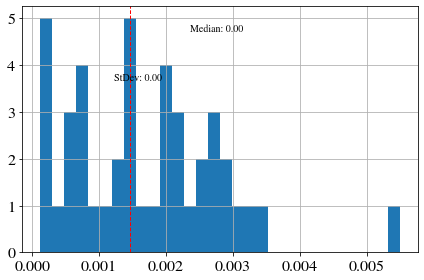

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
balanceKeys = labelsDict.keys()

df.from_dict(labelsDict)[differentLabelTypes[0]].hist(bins=30)
plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
x= df.from_dict(labelsDict)[differentLabelTypes[0]]
print([differentLabelTypes[3]])
min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*1.4, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()))
plt.show()

# df.from_dict(labelsDict)[differentLabelTypes[2]].hist(bins=30)
# plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[2]].median(), color='r', linestyle='dashed', linewidth=1)
# x= df.from_dict(labelsDict)[differentLabelTypes[2]]
# print([differentLabelTypes[4]])
# min_ylim, max_ylim = plt.ylim()
# plt.text(x.mean()*1.4, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))
# plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()))
# plt.show()

In [25]:
tests = df.from_dict(labelsDict)
#g = sns.FacetGrid(tests)
#sns.load_dataset("tips")
testsDF = tests.reset_index().rename(columns={"index": "Date"})
testsDF.head(5)

,Date,label_PrMov__window_10__thres_arbitrary__0.5,label_PrMov__window_15__thres_arbitrary__0.5,label_PrMov__window_2__thres_arbitrary__0.5,label_PrMov__window_7__thres_arbitrary__0.8
0,20170116,0.000583,0.000584,0.000583,0.000389
1,20170117,0.000478,0.000478,0.000477,NaN
2,20170118,0.000121,0.000242,0.000242,0.000121
3,20170119,0.000752,0.000753,0.000902,0.000602
4,20170123,0.001465,0.001467,0.001463,0.001098


In [26]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    ax = sns.distplot(x, fit=norm, kde=False, bins=20)
    _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)))
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(x.std()*0.5, max_ylim*0.1, 'StDev: {:.2f}'.format(x.std()))
    plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show()

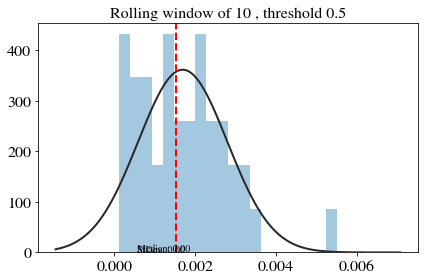

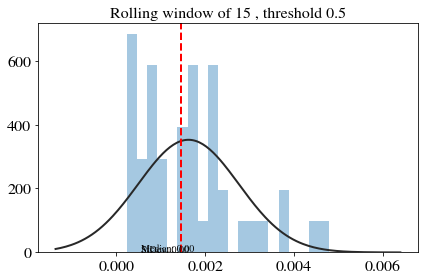

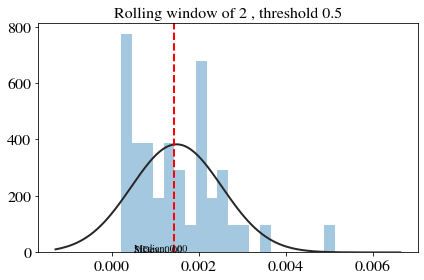

In [27]:
for i in range(0,3):
    x= df.from_dict(labelsDict)[differentLabelTypes[i]]
    price_based_histogram_labels(x, labelText= differentLabelTypes[i])

In [28]:
i=6
x= df.from_dict(labelsDict)[differentLabelTypes[i]]
price_based_histogram_labels(x, labelText= differentLabelTypes[i])

IndexError: index 6 is out of bounds for axis 0 with size 4

In [ ]:
from scipy import stats
x2= df.from_dict(labelsDict)[differentLabelTypes[2]]
x1= df.from_dict(labelsDict)[differentLabelTypes[1]]
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)
    
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

quantile_plot(x1)
quantile_plot(x2)
_=plt.title('Quantile Plots for Labels')
#todo add legends and a 45% degree line

In [ ]:
df1 = testsDF[['Date', 'label_PrMov__window_50__thres_arbitrary__0.1']]
df1Clean = pd.DataFrame()

df1Clean['Date'] = df1['Date']
df1Clean['LabelValue'] = df1['label_PrMov__window_50__thres_arbitrary__0.1']
df1Clean['LabelType'] = 'Label1'

df2 = testsDF[['Date', 'label_PrMov__window_70__thres_arbitrary__0.1']]
df2Clean = pd.DataFrame()

df2Clean['Date'] = df1['Date']
df2Clean['LabelValue'] = df2['label_PrMov__window_70__thres_arbitrary__0.1']
df2Clean['LabelType'] = 'Label2'

df= pd.concat([df1Clean, df2Clean], axis=0)


In [ ]:

g = sns.FacetGrid(df, col="LabelType",legend_out=False)
g.map(sns.distplot, "LabelValue", bins=20,fit=norm, kde=False)

In [ ]:
# differentLabelTypes =test_df.filter(like='label', axis=1).columns.values

# for key_, _ in enumerate(keys_):
#     data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)


In [ ]:
g = sns.FacetGrid(df, col="LabelType",legend_out=False)
g.map(quantile_plot, "LabelValue")
plt.legend([],[], frameon=False)
# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
# 
# ax.set_prop_cycle(color=['red', 'green', 'blue'])
axes = g.fig.axes
x = np.linspace(*ax.get_xlim())#*1.09
y = np.linspace(*ax.get_ylim())#*1.09

for ax in axes:
    ax.plot(x, y,c="red", ls="--",zorder=0)
    ax. legend(loc='upper left', frameon=False) 
    

plt.show()

# for ax in g.axes.flat:
#     ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)